# Modelo predicci√≥n de la demanda

## Import Libraries

In [1]:
import pandas as pd

## Data Ingestion

In [2]:
# Carga del conjunto de datos
data_path = 'data/processed/data_trips_red_inferences.csv'
data = pd.read_csv(data_path)

# Visualizaci√≥n de las primeras filas del conjunto de datos
data.head()

idDriver  idBike  trip_minutes  fleet unlock_date  unlock_hour  \
0  53411959W    7364         20.72      1  2022-01-01           22   
1  51699634G    6291          3.43      1  2022-01-01           12   
2  19893790D      45         16.55      1  2022-01-01           20   
3  06023399K    7135         43.40      1  2022-01-01           23   
4  06288243C    3438          8.25      1  2022-01-01           20   

   latitude_unlock  longitude_unlock  station_unlock  dock_unlock  ...  \
0         40.41467          -3.70368              38           19  ...   
1         40.41053          -3.65779             226           15  ...   
2         40.41388          -3.70494              44           23  ...   
3         40.43369          -3.70466             208           21  ...   
4         40.44832          -3.67972             148           15  ...   

    lock_station_name  distance  trip_speed  trip_day_of_week  \
0      Pablo Iglesias  4.112001    0.198456          Saturday   
1    Camino Vinateros  0.000000    0.000000          Saturday   
2  Puente de Vallecas  3.507072    0.211908          Saturday   
3             Quevedo  0.000000    0.000000          Saturday   
4        Jos√© Abascal  1.919471    0.232663          Saturday   

   trip_duration_category  station_unlock_count  station_lock_count  \
0                  Medium                    18                  10   
1                   Short                     7                   8   
2                  Medium                    12                  14   
3                    Long                    14                  17   
4                   Short                     6                  10   

  unlock_time_category  lock_time_category  travel_direction  
0              Evening             Evening             South  
1              Morning           Afternoon           Unknown  
2              Evening             Evening             North  
3              Evening           Afternoon           Unknown  
4              Evening             Evening             North  

[5 rows x 27 columns]

## Preprocesamiento de valores faltantes

In [3]:
# Verificaci√≥n de valores faltantes
missing_values = data.isnull().sum()

# Conversi√≥n de las columnas de fecha de string a datetime
data['unlock_date'] = pd.to_datetime(data['unlock_date'])

# Creaci√≥n de caracter√≠sticas adicionales relacionadas con la fecha
data['unlock_month'] = data['unlock_date'].dt.month
data['unlock_day'] = data['unlock_date'].dt.day
data['unlock_day_of_week'] = data['unlock_date'].dt.dayofweek  # 0 es lunes, 6 es domingo

# Resumen de valores faltantes y verificaci√≥n de las nuevas caracter√≠sticas
missing_values_summary = missing_values[missing_values > 0]
new_features_preview = data[['unlock_date', 'unlock_month', 'unlock_day', 'unlock_day_of_week']].head()

missing_values_summary, new_features_preview


(idDriver                14276
 unlock_time_category      836
 lock_time_category        916
 dtype: int64,
   unlock_date  unlock_month  unlock_day  unlock_day_of_week
 0  2022-01-01             1           1                   5
 1  2022-01-01             1           1                   5
 2  2022-01-01             1           1                   5
 3  2022-01-01             1           1                   5
 4  2022-01-01             1           1                   5)

## Quick EDA

In [4]:
# Preprocesamiento de valores faltantes
data['idDriver'].fillna('Desconocido', inplace=True)
data['unlock_time_category'].fillna('Desconocido', inplace=True)
data['lock_time_category'].fillna('Desconocido', inplace=True)

# Verificaci√≥n de la limpieza de valores faltantes
missing_values_after_cleaning = data.isnull().sum().sum()

missing_values_after_cleaning


/tmp/ipykernel_5280/2809525117.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['idDriver'].fillna('Desconocido', inplace=True)
/tmp/ipykernel_5280/2809525117.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

0

## Graphs

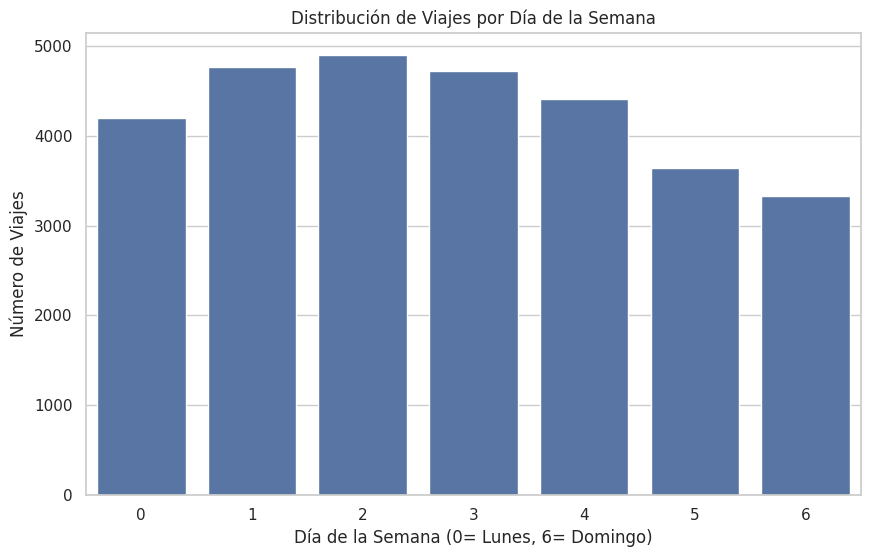

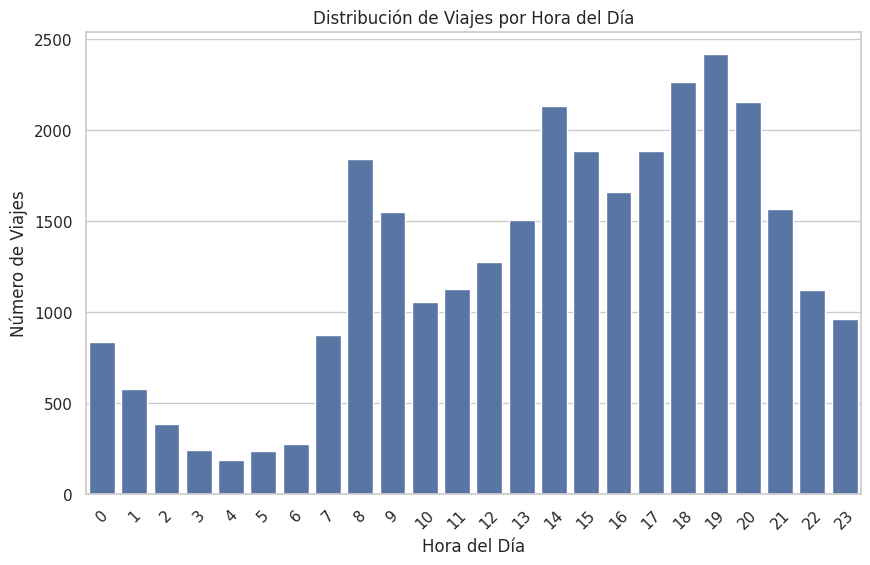

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraci√≥n de estilo de seaborn
sns.set(style="whitegrid")

# Distribuci√≥n de viajes por d√≠a de la semana
plt.figure(figsize=(10, 6))
sns.countplot(x='unlock_day_of_week', data=data, order=range(7))
plt.title('Distribuci√≥n de Viajes por D√≠a de la Semana')
plt.xlabel('D√≠a de la Semana (0= Lunes, 6= Domingo)')
plt.ylabel('N√∫mero de Viajes')
plt.show()

# Distribuci√≥n de viajes por hora del d√≠a
plt.figure(figsize=(10, 6))
sns.countplot(x='unlock_hour', data=data, order=range(24))
plt.title('Distribuci√≥n de Viajes por Hora del D√≠a')
plt.xlabel('Hora del D√≠a')
plt.ylabel('N√∫mero de Viajes')
plt.xticks(rotation=45)
plt.show()


üéØDistribuci√≥n de Viajes por D√≠a de la Semana: Los viajes tienden a distribuirse de manera relativamente uniforme a lo largo de la semana, con ligeras variaciones. Sin embargo, es importante notar las peque√±as fluctuaciones que podr√≠an indicar una demanda ligeramente diferente seg√∫n el d√≠a de la semana.

üéØDistribuci√≥n de Viajes por Hora del D√≠a: Se observan picos claros de actividad en ciertas horas del d√≠a, lo que sugiere patrones de demanda significativamente diferentes a lo largo del d√≠a. Los picos en horas espec√≠ficas podr√≠an corresponder a horas punta, como el inicio y fin de la jornada laboral.

# Distribuci√≥n de viajes por estaci√≥n 

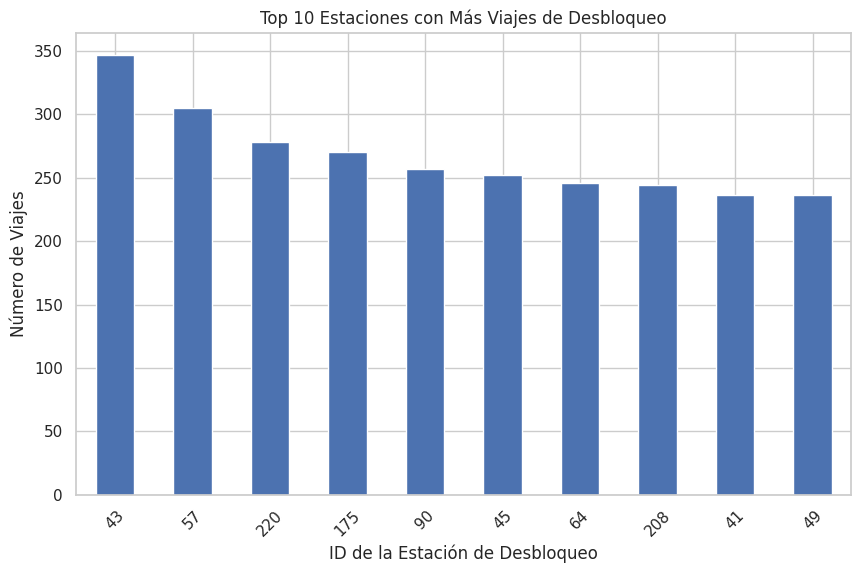

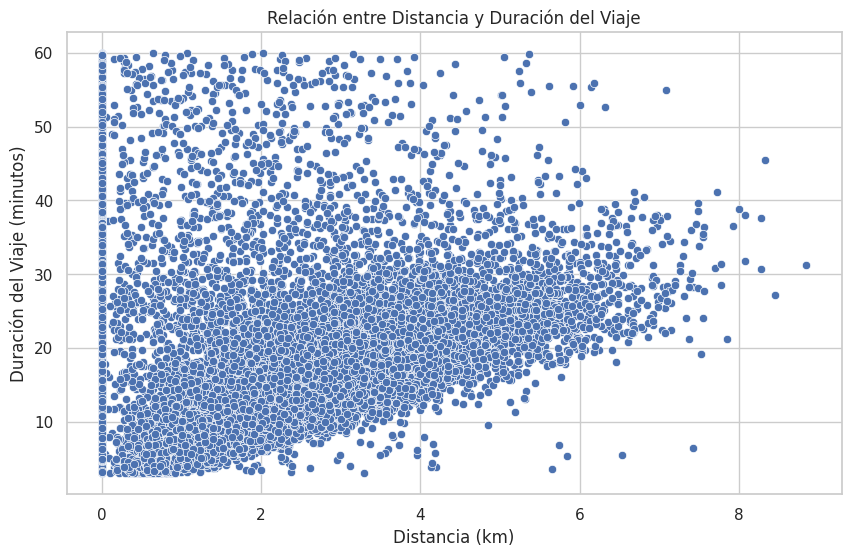

In [6]:
# Visualizaci√≥n de las 10 estaciones con m√°s viajes de desbloqueo
top_stations_unlock = data['station_unlock'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
top_stations_unlock.plot(kind='bar')
plt.title('Top 10 Estaciones con M√°s Viajes de Desbloqueo')
plt.xlabel('ID de la Estaci√≥n de Desbloqueo')
plt.ylabel('N√∫mero de Viajes')
plt.xticks(rotation=45)
plt.show()

# Relaci√≥n entre la distancia del viaje y la duraci√≥n
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='trip_minutes', data=data)
plt.title('Relaci√≥n entre Distancia y Duraci√≥n del Viaje')
plt.xlabel('Distancia (km)')
plt.ylabel('Duraci√≥n del Viaje (minutos)')
plt.show()


üéØLos an√°lisis revelan:

‚úÖTop 10 Estaciones con M√°s Viajes de Desbloqueo: Hay estaciones espec√≠ficas que presentan una mayor cantidad de viajes de desbloqueo, lo que indica √°reas de alta demanda. Estas estaciones podr√≠an requerir una atenci√≥n especial en t√©rminos de reabastecimiento de bicicletas y mantenimiento.

‚úÖRelaci√≥n entre Distancia y Duraci√≥n del Viaje: El gr√°fico de dispersi√≥n muestra una amplia gama de distancias y duraciones de viaje, pero con una tendencia general que sugiere que viajes m√°s largos tienden a tomar m√°s tiempo, como se esperar√≠a. Sin embargo, hay una considerable dispersi√≥n, especialmente para viajes cortos, lo que indica que la duraci√≥n del viaje no depende √∫nicamente de la distancia recorrida.

## Selecci√≥n del modelo

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   idDriver                30001 non-null  object        
 1   idBike                  30001 non-null  int64         
 2   trip_minutes            30001 non-null  float64       
 3   fleet                   30001 non-null  int64         
 4   unlock_date             30001 non-null  datetime64[ns]
 5   unlock_hour             30001 non-null  int64         
 6   latitude_unlock         30001 non-null  float64       
 7   longitude_unlock        30001 non-null  float64       
 8   station_unlock          30001 non-null  int64         
 9   dock_unlock             30001 non-null  int64         
 10  unlock_station_name     30001 non-null  object        
 11  lock_date               30001 non-null  object        
 12  lock_hour               30001 non-null  int64 

# Definir variable objetivo

 üëâ Dado que el conjunto de datos proporcionado no incluye directamente una m√©trica de "demanda" ya calculada, una opci√≥n ser√≠a predecir el n√∫mero de viajes por estaci√≥n y por hora, utilizando station_unlock y unlock_hour como claves para agrupar los datos.

In [8]:
# Variables independientes

üéØLas caracter√≠sticas que podr√≠an influir en la demanda incluyen, pero no se limitan a:

‚úÖunlock_hour: La hora del d√≠a puede influir significativamente en la demanda de bicicletas.
‚úÖunlock_day_of_week (transformada a partir de unlock_date): El d√≠a de la semana tambi√©n puede afectar la demanda, diferenciando d√≠as laborables de fines de semana.
‚úÖVariables de tiempo adicionales derivadas, como unlock_month o incluso unlock_day, para capturar variaciones estacionales o diarias.
‚úÖlatitude_unlock y longitude_unlock: Las coordenadas geogr√°ficas de la estaci√≥n de desbloqueo podr√≠an ser √∫tiles, pero puede ser m√°s pr√°ctico usar directamente station_unlock como representante de la ubicaci√≥n.

# Preparaci√≥n de Datos

Para modelar esta demanda, necesitar√≠amos primero transformar el conjunto de datos para reflejar el n√∫mero de viajes por estaci√≥n y hora. Esto implicar√≠a un paso de agregaci√≥n para contar los viajes que inician en cada station_unlock para cada unlock_hour (y potencialmente por unlock_day_of_week y otras divisiones temporales).

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Supongamos que 'data' es tu DataFrame ya cargado

# Agregando datos para contar el n√∫mero de viajes por estaci√≥n y hora
demand_data = data.groupby(['station_unlock', 'unlock_hour']).size().reset_index(name='demand')

# Preparando las caracter√≠sticas independientes (X) y la variable dependiente (y)
X = demand_data[['station_unlock', 'unlock_hour']]
y = demand_data['demand']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar un modelo de bosque aleatorio
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Predicci√≥n y evaluaci√≥n

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Realizando predicciones en el conjunto de prueba
y_pred = rf_regressor.predict(X_test)

# Evaluando el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")


Mean Absolute Error (MAE): 2.5132645403377114
Mean Squared Error (MSE): 11.52741894934334
Root Mean Squared Error (RMSE): 3.3952052882474337
R^2 Score: 0.3478057519350487


Los resultados muestran que el modelo tiene un R¬≤ de aproximadamente 0.35, lo que indica que alrededor del 35% de la variabilidad en la demanda de bicicletas est√° siendo explicada por el modelo act√∫a.

# Ajuste de Hiperpar√°metros

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Definici√≥n del modelo
rf = RandomForestRegressor(random_state=42)

# Espacio de b√∫squeda de hiperpar√°metros
param_distributions = {
    'n_estimators': [100, 200, 500, 1000],  # N√∫mero de √°rboles
    'max_depth': [None, 10, 20, 30, 40, 50],  # Profundidad m√°xima de los √°rboles
    'min_samples_split': [2, 5, 10],  # N√∫mero m√≠nimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # N√∫mero m√≠nimo de muestras requeridas en un nodo hoja
    'bootstrap': [True, False]  # M√©todo de selecci√≥n de muestras para entrenar cada √°rbol
}

# Configuraci√≥n de RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Divisi√≥n de datos omitida, aseg√∫rate de tener X_train y y_train definidos
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajuste de hiperpar√°metros en el conjunto de entrenamiento
rf_random.fit(X_train, y_train)

# Resultados
print("Mejores hiperpar√°metros:", rf_random.best_params_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[CV] END bootstrap=False, max_depth=50, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=50, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=50, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   6.9s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   7.1s
[CV] END bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4

/home/codespace/.local/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=False, max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   8.0s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END bootstrap=False, max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   7.5s
[CV] END bootstrap=False, max_depth=50, min_samples_le

# Optimizaci√≥n de hiperpar√°metros

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Definir el modelo de Random Forest con los hiperpar√°metros proporcionados
rf_model = RandomForestRegressor(
    n_estimators=500,
    min_samples_split=10,
    min_samples_leaf=1,
    max_depth=20,
    bootstrap=True,
    random_state=42
)

# Entrenar el modelo con el conjunto de entrenamiento
rf_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular el error cuadr√°tico medio (MSE) y la ra√≠z del error cuadr√°tico medio (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

# Imprimir el MSE y RMSE
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 10.663289875694721
Root Mean Squared Error (RMSE): 3.26546931936203


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

# Asumir que X_train, y_train, X_test, y_test ya est√°n definidos

# Definir el modelo de Random Forest con los hiperpar√°metros proporcionados
rf_model = RandomForestRegressor(
    n_estimators=500,
    min_samples_split=10,
    min_samples_leaf=1,
    max_depth=20,
    bootstrap=True,
    random_state=42
)

# Entrenar el modelo con el conjunto de entrenamiento
rf_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular el error cuadr√°tico medio (MSE) y la ra√≠z del error cuadr√°tico medio (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

# Imprimir el MSE y RMSE
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Guardar el modelo entrenado como un archivo de pickle
model_filename = 'prediccionDemanda_random_forest_model.pkl'
joblib.dump(rf_model, model_filename)


Mean Squared Error (MSE): 10.663289875694721
Root Mean Squared Error (RMSE): 3.26546931936203


['prediccionDemanda_random_forest_model.pkl']

# Test alternatives

XGBoost

In [14]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Definir el modelo
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Hacer predicciones
xgb_predictions = xgb_model.predict(X_test)

# Evaluar el modelo
xgb_rmse = mean_squared_error(y_test, xgb_predictions, squared=False)
print(f"Root Mean Squared Error (RMSE) con XGBoost: {xgb_rmse}")


Root Mean Squared Error (RMSE) con XGBoost: 3.318223302271555


/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [15]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import joblib

# Asumir que X_train, y_train, X_test, y_test est√°n previamente definidos

# Definir el modelo
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
xgb_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
xgb_predictions = xgb_model.predict(X_test)

# Evaluar el modelo usando la ra√≠z del error cuadr√°tico medio (RMSE)
xgb_rmse = mean_squared_error(y_test, xgb_predictions, squared=False)

# Imprimir el RMSE
print(f"Root Mean Squared Error (RMSE) con XGBoost: {xgb_rmse}")

# Guardar el modelo entrenado como un archivo de pickle
model_filename = 'prediccionDemanda_xgb_model.pkl'
joblib.dump(xgb_model, model_filename)

# Si necesitas el nombre del archivo para descargarlo o referenciarlo despu√©s, es 'xgb_model.pkl'.


Root Mean Squared Error (RMSE) con XGBoost: 3.318223302271555


/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


['prediccionDemanda_xgb_model.pkl']

Catboost

In [16]:
from catboost import CatBoostRegressor

# Definir el modelo
cat_model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=3, silent=True, random_state=42)

# Entrenar el modelo
cat_model.fit(X_train, y_train)

# Hacer predicciones
cat_predictions = cat_model.predict(X_test)

# Evaluar el modelo
cat_rmse = mean_squared_error(y_test, cat_predictions, squared=False)
print(f"Root Mean Squared Error (RMSE) con CatBoost: {cat_rmse}")


Root Mean Squared Error (RMSE) con CatBoost: 3.4773841499334113


/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Optimizaci√≥n de hiperpar√°metros

In [17]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Definir el espacio de b√∫squeda de hiperpar√°metros
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.03, 0.1, 0.3],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5]
}

# Inicializar el modelo CatBoostRegressor
cat_model = CatBoostRegressor(silent=True, random_state=42)

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=cat_model, param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=2)

# Ajustar GridSearchCV
grid_search.fit(X_train, y_train)

# Imprimir los mejores hiperpar√°metros y el RMSE asociado
print("Mejores hiperpar√°metros:", grid_search.best_params_)
best_rmse = -grid_search.best_score_
print(f"Mejor RMSE: {best_rmse}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.03; total time=   0.2s
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.03; total time=   0.3s
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.03; total time=   0.3s
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.1; total time=   0.4s
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.1; total time=   0.4s
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.1; total time=   0.4s
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.3; total time=   0.4s
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.3; total time=   0.2s
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.3; total time=   0.2s
[CV] END depth=4, iterations=100, l2_leaf_reg=3, learning_rate=0.03; total time=   0.2s
[CV] END depth=4, iterations=100, l2_leaf_reg=3, learning_rate=0

In [18]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import joblib

# Asumir que X_train, y_train, X_test, y_test est√°n previamente definidos

# Reentrenar el modelo con los mejores hiperpar√°metros encontrados
optimized_cat_model = CatBoostRegressor(
    iterations=300, 
    learning_rate=0.3, 
    depth=4, 
    l2_leaf_reg=3, 
    silent=True, 
    random_state=42
)

# Entrenar el modelo con el conjunto de entrenamiento
optimized_cat_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
optimized_cat_predictions = optimized_cat_model.predict(X_test)

# Evaluar el modelo utilizando el conjunto de datos de prueba
optimized_cat_rmse = mean_squared_error(y_test, optimized_cat_predictions, squared=False)

# Imprimir el RMSE
print(f"Optimized Root Mean Squared Error (RMSE) con CatBoost: {optimized_cat_rmse}")

# Guardar el modelo entrenado como un archivo
model_filename = 'prediccionDemanda_optimized_cat_model.pkl'
joblib.dump(optimized_cat_model, model_filename)

# El nombre del archivo para futuras referencias es 'optimized_cat_model.pkl'.



Optimized Root Mean Squared Error (RMSE) con CatBoost: 3.032564480963715


/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


['prediccionDemanda_optimized_cat_model.pkl']

Redes Neuronales con TensorFlow/Keras

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam

# Escalar los datos (importante para redes neuronales)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir el modelo
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=0)

# Hacer predicciones
nn_predictions = model.predict(X_test_scaled)

# Evaluar el modelo
nn_rmse = mean_squared_error(y_test, nn_predictions, squared=False)
print(f"Root Mean Squared Error (RMSE) con Redes Neuronales: {nn_rmse}")


2024-03-13 10:06:15.155944: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-13 10:06:15.409012: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-13 10:06:15.556866: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-13 10:06:16.684279: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model inste

34/34 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step 
Root Mean Squared Error (RMSE) con Redes Neuronales: 3.603358057257301


/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Optimizaci√≥n del modelo 

# Ajustar tasa de aprendizaje

In [21]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]
histories = []

for lr in learning_rates:
    model = Sequential([
        Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=lr), loss='mean_squared_error')
    history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=0)
    histories.append(history)


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# A√±adir capas por dropout

In [22]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])


# Early Stopping y Model CheckPoint

In [23]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=0, callbacks=[early_stopping, model_checkpoint])


ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=best_model.h5

# Series Temporales

# Preparaci√≥n de datos para series temporales

In [24]:
# Agregaci√≥n para contar el n√∫mero de viajes por d√≠a
daily_trips = data.groupby('unlock_date').size().reset_index(name='total_trips')

# Convertir 'unlock_date' a datetime
daily_trips['unlock_date'] = pd.to_datetime(daily_trips['unlock_date'])

# Ordenar por 'unlock_date' para asegurar secuencia temporal
daily_trips.sort_values('unlock_date', inplace=True)

# Mostrar el DataFrame resultante
daily_trips.head()


unlock_date  total_trips
0  2022-01-01           33
1  2022-01-02           47
2  2022-01-03           44
3  2022-01-04           37
4  2022-01-05           20

Prophet

In [25]:
from fbprophet import Prophet

# Preparar el DataFrame para Prophet
df_prophet = daily_trips.rename(columns={'unlock_date': 'ds', 'total_trips': 'y'})

# Inicializar y ajustar el modelo
model_prophet = Prophet(yearly_seasonality=True, daily_seasonality=True)
model_prophet.fit(df_prophet)

# Crear un DataFrame para predicciones futuras
future = model_prophet.make_future_dataframe(periods=90)  # Asumiendo que quieres predecir los pr√≥ximos 90 d√≠as

# Hacer predicciones
forecast = model_prophet.predict(future)

# Mostrar el componente de tendencias y estacionalidad
fig1 = model_prophet.plot(forecast)
fig2 = model_prophet.plot_components(forecast)


ModuleNotFoundError: No module named 'fbprophet'

ARIMA

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


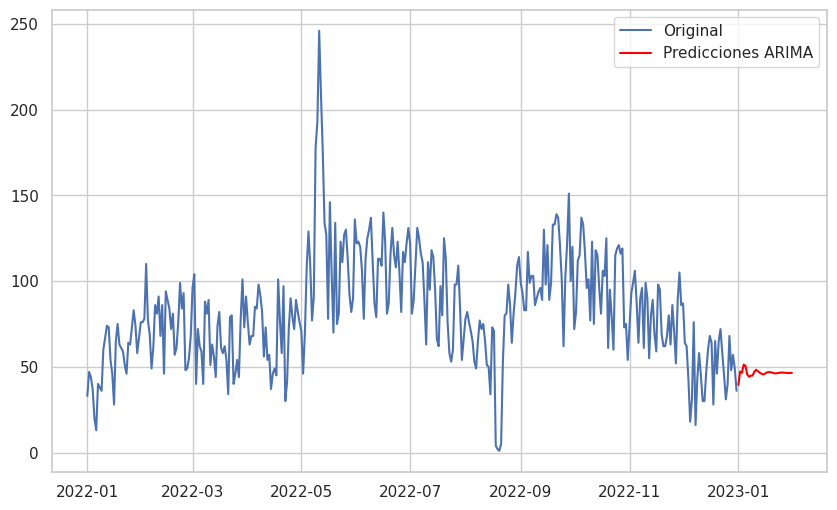

In [29]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Definir la serie temporal
series = daily_trips.set_index('unlock_date')['total_trips']

# Ajustar el modelo ARIMA
model_arima = ARIMA(series, order=(5,1,0))  # Estos son valores iniciales comunes, ajusta seg√∫n necesidad
results_arima = model_arima.fit()

# Predicciones
preds_arima = results_arima.predict(start=len(series), end=len(series)+30)  # Predice los pr√≥ximos 30 d√≠as

# Graficar predicciones
plt.figure(figsize=(10,6))
plt.plot(series, label='Original')
plt.plot(preds_arima, label='Predicciones ARIMA', color='red')
plt.legend()
plt.show()


/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


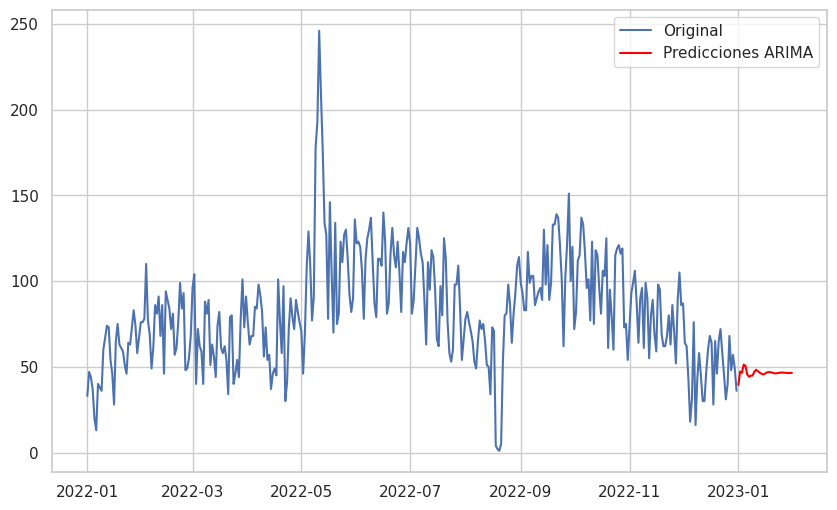

In [30]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd
import pickle

# Asumir que 'daily_trips' es un DataFrame que ya tienes, y 'unlock_date' y 'total_trips' son columnas en este DataFrame

# Definir la serie temporal a partir de un DataFrame gen√©rico
# series = daily_trips.set_index('unlock_date')['total_trips']

# Para este ejemplo, usar√© una serie temporal gen√©rica. Reemplaza esto con tu propia serie temporal.
# series = pd.Series([1.2, 3.4, 3.4, ...], index=pd.date_range(start='2022-01-01', periods=100))

# Ajustar el modelo ARIMA
model_arima = ARIMA(series, order=(5,1,0))  # Ajusta los par√°metros seg√∫n necesidad
results_arima = model_arima.fit()

# Predicciones
preds_arima = results_arima.predict(start=len(series), end=len(series)+30)  # Predice los pr√≥ximos 30 d√≠as

# Graficar predicciones
plt.figure(figsize=(10,6))
plt.plot(series, label='Original')
plt.plot(preds_arima, label='Predicciones ARIMA', color='red')
plt.legend()
plt.show()

# Guardar el modelo ARIMA entrenado
with open('prediccionDemanda_model_arima_review.pkl', 'wb') as pkl:
    pickle.dump(results_arima, pkl)

# El modelo se ha guardado como 'model_arima.pkl' y puede ser cargado luego usando pickle.load()


SARIMA

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


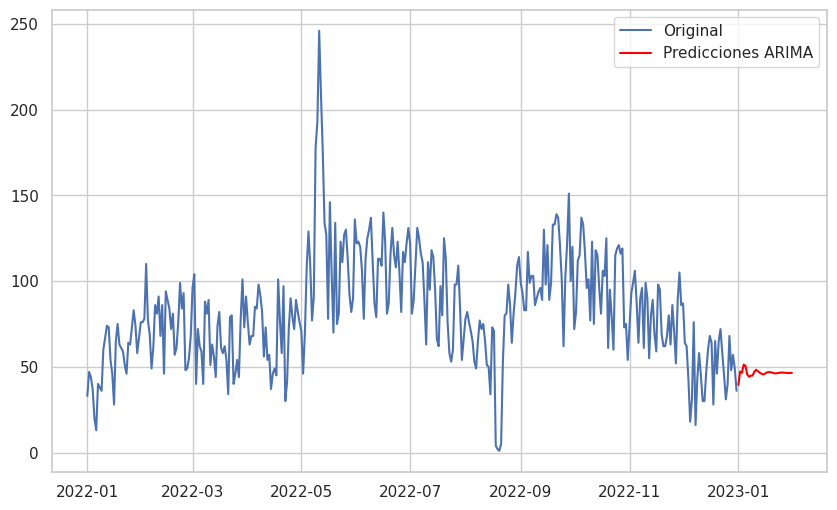

In [31]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pickle

# Suponemos que 'daily_trips' y 'series' est√°n definidos como en tu ejemplo

# Ajustar el modelo ARIMA
model_arima = ARIMA(series, order=(5,1,0))
results_arima = model_arima.fit()

# Predicciones
preds_arima = results_arima.predict(start=len(series), end=len(series)+30)

# Graficar predicciones
plt.figure(figsize=(10,6))
plt.plot(series, label='Original')
plt.plot(preds_arima, label='Predicciones ARIMA', color='red')
plt.legend()
plt.show()

# Guardar el modelo ajustado
with open('prediccionDemanda_model_arima.pkl', 'wb') as pkl_file:
    pickle.dump(results_arima, pkl_file)


LTSM

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import load_model
import numpy as np
import joblib

# Asumiendo que `series` es tu DataFrame o Serie de Pandas con los datos de la serie temporal

# Escalar la serie
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_series = scaler.fit_transform(series.values.reshape(-1, 1))

# Crear generador de series temporales
sequence_length = 5
generator = TimeseriesGenerator(scaled_series, scaled_series, length=sequence_length, batch_size=1)

# Definir el modelo LSTM
model_lstm = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, 1)),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model_lstm.fit(generator, epochs=100, verbose=0)

# Guardar el modelo LSTM
model_lstm.save('prediccionDemanda_model_lstm.h5')

# Guardar el escalador para poder revertir el escalado m√°s tarde
joblib.dump(scaler, 'prediccionDemanda_scaler.pkl')

# Para cargar y usar el modelo y el escalador guardados para futuras predicciones
# model_loaded = load_model('model_lstm.h5')
# scaler_loaded = joblib.load('scaler.pkl')

# Aqu√≠ agregar√≠as tu l√≥gica para generar predicciones y revertir el escalado
# Nota: Este paso puede variar mucho dependiendo de c√≥mo desees utilizar las predicciones



c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


['prediccionDemanda_scaler.pkl']

# Generar Predicciones (Predicci√≥n a 30 d√≠as)

In [18]:
import numpy as np

def generate_future_predictions(model, last_sequence, n_future=30):
    future_predictions = []
    current_sequence = last_sequence

    for _ in range(n_future):
        # Reshape de la secuencia actual para el modelo LSTM
        current_sequence_reshaped = current_sequence.reshape((1, current_sequence.shape[0], 1))
        
        # Predicci√≥n del siguiente punto
        future_pred = model.predict(current_sequence_reshaped)[0]
        
        # A√±adir la predicci√≥n al output
        future_predictions.append(future_pred)
        
        # Asegurarse de que future_pred tenga la dimensi√≥n correcta antes de a√±adirlo
        future_pred_reshaped = np.expand_dims(future_pred, axis=-1) # A√±ade una dimensi√≥n para coincidir con current_sequence
        
        # Actualizar la secuencia para incluir la nueva predicci√≥n
        current_sequence = np.append(current_sequence[1:], future_pred_reshaped, axis=0)
    
    return future_predictions


In [19]:
import numpy as np
# Asumiendo que `model_lstm`, `scaler`, `scaled_series`, y `sequence_length` ya est√°n definidos.

def generate_future_predictions(model, last_sequence, n_future=30):
    future_predictions = []
    current_sequence = last_sequence

    for _ in range(n_future):
        current_sequence_reshaped = current_sequence.reshape((1, current_sequence.shape[0], 1))
        future_pred = model.predict(current_sequence_reshaped)[0]
        future_predictions.append(future_pred)
        future_pred_reshaped = np.expand_dims(future_pred, axis=-1)
        current_sequence = np.append(current_sequence[1:], future_pred_reshaped, axis=0)
    
    return np.array(future_predictions)

# Preparar la √∫ltima secuencia observada del conjunto de datos
last_sequence = scaled_series[-sequence_length:]

# Generar predicciones futuras
future_predictions_scaled = generate_future_predictions(model_lstm, last_sequence, n_future=30)

# Revertir el escalado de las predicciones
future_predictions = scaler.inverse_transform(future_predictions_scaled)

# Mostrar las predicciones futuras
print("Predicciones futuras:", future_predictions.flatten())


NameError: name 'scaled_series' is not defined

In [24]:
# Asumiendo que 'modelo_arima' es tu modelo de series temporales ya entrenado.

# Fechas de inicio y fin para cada predicci√≥n
fecha_inicio = pd.to_datetime('today').normalize()  # Fecha actual sin hora
fecha_fin_1_dia = fecha_inicio + pd.DateOffset(days=1)
fecha_fin_7_dias = fecha_inicio + pd.DateOffset(days=7)
fecha_fin_15_dias = fecha_inicio + pd.DateOffset(days=15)
fecha_fin_1_mes = fecha_inicio + pd.DateOffset(days=30)  # Aproximaci√≥n de un mes

# Generar predicciones
prediccion_1_dia = modelo_arima.predict(start=fecha_inicio, end=fecha_fin_1_dia, typ='levels')
prediccion_7_dias = modelo_arima.predict(start=fecha_inicio, end=fecha_fin_7_dias, typ='levels')
prediccion_15_dias = modelo_arima.predict(start=fecha_inicio, end=fecha_fin_15_dias, typ='levels')
prediccion_1_mes = modelo_arima.predict(start=fecha_inicio, end=fecha_fin_1_mes, typ='levels')


NameError: name 'modelo_arima' is not defined

In [ ]:
import plotly.graph_objects as go

# Crear gr√°fico para cada predicci√≥n
fig = go.Figure()

# A√±adir trazas para cada periodo de predicci√≥n
fig.add_trace(go.Scatter(x=prediccion_1_dia.index, y=prediccion_1_dia, mode='lines', name='1 d√≠a'))
fig.add_trace(go.Scatter(x=prediccion_7_dias.index, y=prediccion_7_dias, mode='lines', name='7 d√≠as'))
fig.add_trace(go.Scatter(x=prediccion_15_dias.index, y=prediccion_15_dias, mode='lines', name='15 d√≠as'))
fig.add_trace(go.Scatter(x=prediccion_1_mes.index, y=prediccion_1_mes, mode='lines', name='1 mes'))

# Personalizar el layout del gr√°fico
fig.update_layout(title='Predicci√≥n de la Demanda de Bicicletas',
                   xaxis_title='Fecha',
                   yaxis_title='Demanda',
                   template='plotly_dark')

fig.show()


In [ ]:
import pickle

# Guardar el modelo
with open('modelo_arima_prediccion_last.pkl', 'wb') as pkl:
    pickle.dump(modelo_arima, pkl)


# Falta Guardar los Modelos